<a href="https://colab.research.google.com/github/biku1998/NLP-Notebooks/blob/master/NLP_01_BOW_TF-IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this notebook we will see the most basic topic in NLP i.e how do we represent words into numerical format.

* The story of NLP starts with a document. These are nothing but terms used for representing a piece of text. Can be a simple string, can be large book. Another term that you can hear is corpus which means a collection of such documents.

---
**Bag of Words**

Steps to create Bag of Words

- Construct a set of all the words you have in your corpus. why set ? --> no duplicates
- Each word in the set is a different dimension.
- Each line or sentence in your data will be a vector or list in very simple terms of size (1,no_of_unique_words_in_corpus) or (1,len(set)). So each index i will represent a word.
- And the element at that index will be = # times the word occurs in the given line or sentence.

e.g

A man is running in a park --> [0 ,1 ,0 ,0 ,0 , 0 ,1 ,0 ,2 0, 0 ,1........]
                                
    1-(man appeared 1 time)     1-(running appeared 1 time)   2-(a){a appeared 2 times}     1-(park appeared 1 time) ....

**Some points about Bag Of Words**
- as you can see as the size of corpus increases the size of each vector representing a line increases
- the vector is very sparse i.e most of the values are zero
- bag of words does not capture semantic of a text, we can see that it's doing nothing but counting common words.

---

**Binary or boolean Bag of Words**
- It's same as bag of words but instead of putting the no of occurrence it simply put 1 if the word exist else 0
- So binary bag of words can be thought of as no of differing words


**Let's see how to implement both in pure python**

I will try my best to follow best coding practices

In [0]:
import numpy as np

In [0]:
########### Bag of Words

class BagOfWords(object):
    def __init__(self,corpus:list):
        if not isinstance(corpus,list):
            raise Exception(f"corpus type should be a list of documents i.e strings not {type(corpus)}")
        self.corpus_len = len(corpus)
        self.unique_words = set()
        self.corpus = corpus # don't do this if the corpus is large otherwise your RAM usage will incerease        
        self.construct_corpus()
    
    def construct_corpus(self):
        for document in self.corpus:
            tokens = document.split(" ")
            for t in tokens:
                self.unique_words.add(t.strip())
                
    def get_numeric_rep(self,document:str):
        if not isinstance(document,str):
            raise Exception(f"document must be string not {type(document)}")
        word_dict = dict.fromkeys(self.unique_words,0)
        
        for word in document.split(" "):
            word_dict[word.strip()] += 1
            
        return np.array(list(word_dict.values()))
    
############ Binary Bag of Words

class BinaryBagOfWords(object):
    def __init__(self,corpus:list):
        if not isinstance(corpus,list):
            raise Exception("corpus type should be a list of documents i.e strings")
        self.corpus_len = len(corpus)
        self.unique_words = set()
        self.corpus = corpus # don't do this if the corpus is large otherwise your RAM usage will incerease        
        self.construct_corpus()
    
    def construct_corpus(self):
        for document in self.corpus:
            tokens = document.split(" ")
            for t in tokens:
                self.unique_words.add(t.strip())
                
    def get_numeric_rep(self,document:str):
        if not isinstance(document,str):
            raise Exception("document must be string")
        word_dict = dict.fromkeys(self.unique_words,0)
        
        for word in document.split(" "):
            word_dict[word.strip()] = 1
            
        return np.array(list(word_dict.values()))

In [0]:
# Let's take 2 simple document

docA = "the cat is sitting on my face"
docB = "the dog is sitting on my bed"

In [0]:
bow  = BagOfWords([docA,docB])
bow_binary = BinaryBagOfWords([docA,docB])

In [0]:
bow.corpus_len,bow_binary.corpus_len # 2 documents

(2, 2)

In [0]:
bow.unique_words,bow_binary.unique_words

({'bed', 'cat', 'dog', 'face', 'is', 'my', 'on', 'sitting', 'the'},
 {'bed', 'cat', 'dog', 'face', 'is', 'my', 'on', 'sitting', 'the'})

In [0]:
bow.get_numeric_rep(docA)

array([1, 1, 0, 1, 1, 1, 1, 0, 1])

In [0]:
bow_binary.get_numeric_rep(docA)

array([1, 1, 0, 1, 1, 1, 1, 0, 1])

In [0]:
docTest = "the cat is sitting on my face the cat is"
bow.get_numeric_rep(docTest) # the elements are freq of words

array([1, 1, 0, 2, 2, 2, 1, 0, 1])

In [0]:
bow_binary.get_numeric_rep(docTest) # the elements are just binary value i.e word exist or not

array([1, 1, 0, 1, 1, 1, 1, 0, 1])

In [0]:
# let's compare the numerical conversion of 2 documents carefully

import pandas as pd

In [0]:
print(docA)
print(docB)
pd.DataFrame(columns = bow.unique_words,data = [bow.get_numeric_rep(docA),bow.get_numeric_rep(docB)])

the cat is sitting on my face
the dog is sitting on my bed


,face,my,bed,cat,is,the,sitting,dog,on
0,1,1,0,1,1,1,1,0,1
1,0,1,1,0,1,1,1,1,1


**Observations**

- if we see words like a, the, is etc are pretty common words and they occur in both documents
- The problem with BOW is we are using too much words which don't mean much .i.e those words don't help to differentiate those 2 documents we have hence they are often called **stop words**


- So in any language the words mostly follow power law distribution. If we use this count based approach then we will end up with a lot of words that do not contain a lot of information.
- Hence they will end up hurting the performance of **simpler models** like Naive Bayes etc.
- In more capable networks like Neural Network these words are not removed because they can through context sometimes, this is why common text cleaning are not advised when using large architectures

- **Sometime we also remove stop-words , do stemming , lemmatization (we will cover later) before building Bag of words** So that we get good quality of numerical rep.

**Look at this interesting case of guy using RNN for text classification using Fast.ai library**

<img src = "./twitter_stop_words.png"></img>

### Hmm so we need a better way to handle our numerical conversion process

    
---
**TF-IDF** (term frequency - inverse document frequency)

**TF**

$TF(w_i,d_j) = \frac{no ~of ~times ~w_i ~occurs ~in ~d_j}{total ~no ~of ~words ~in ~d_j}$ 

In words
 - Term freq of any word $w_i$ in a document $d_j$ is equal to no time word $w_i$ occurs in document $d_j$ by total no of words in document $d_j$
 
Some key points
 - $ 0 \leq TF(w_i,d_j) \leq 1$ Hence we can interpret it as probabilities so term freq says "**what is the probability of finding a word in a document**". The other way to say this is "**how often does a word occurs in a document**"
- So the more often the word occurs the higher the term frequency and vice versa
 
- fun fact : all of these bag of words, Tf-Idf were first discovered in information retrieval branch of NLP
---

**IDF**

$IDF(w_i,D_c)=\log(\frac{N ~(total ~no ~of ~documents)}{n_i~(documents ~which ~contain ~w_i) })$ where $w_i$ is i'th word and $D_c$ corpus of documents

Some pointers regarding tf-idf
- $n_i \leq N$  ==>  $\frac{N}{n_i}\geq 1$  ==> $\log(\frac{N}{n_i}) \geq 0$, so IDF is always positive
- **But when IDF will be equal to 1 ?**

Let's figure it out

Suppose $n_i$ increases which will result in decrease of $\frac{N}{n_i}$ Which will result in decrease of  $\log(\frac{N}{n_i})$ because log is **monotonically increasing function**, what the hell is this ? -> When $f(x)$ increases as $x$ increases, this type of function is called monotonically increasing fn. For more info <a href = "https://en.wikipedia.org/wiki/Monotonic_function">here </a>


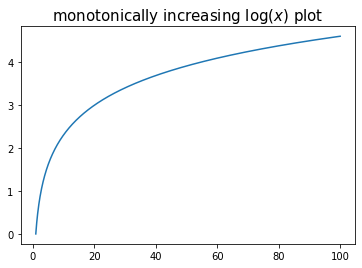

In [0]:
import matplotlib.pyplot as plt

x = np.linspace(1,100,1000)
y = np.log(x)

plt.plot(x,y)
plt.title("monotonically increasing $\log(x)$ plot",fontsize = 15)
plt.show()

So we now know if a word $w_i$ occurs in almost all the document the IDF of that word will be very low.
Which is nothing but if $n_i\uparrow$ then $IDF\downarrow$ 

Can you guess some words that will reflect the above case ? Yes.. **All the stop words**

And and if  $n_i\downarrow$ then $IDF\uparrow$

Can you guess some words that will reflect the above case ? Yes.. **All the rare words**

**Okay Let's combine Tf and Idf to see how we will achieve our task of converting words to numerical forms**

---
Suppose a sentence "A man is running in the park" will be represented as follows $[w_1,w_2,w_3,w_4,w_5,w_6,w_7]$ where $w_i$ is a word in the sentence and we will replace $w_i$ with $TF(w_i,d_j) * IDF(w_i,D_c)$

But what does this mean ? 

When will $TF(w_i,d_j)$ be high ? --> When word will occur more frequent
and when will $IDF(w_i,D_c)$ be high ? --> when a word is rare 

Ohh which means **We are giving more importance to rare words**

**But still TF-IDF does not take semantic meaning of words in consideration**

    Okay Time to code Tf-Idf

In [0]:
class Tf_Idf(object):
    def __init__(self,corpus:list):
        if not isinstance(corpus,list):
            raise Exception(f"corpus type should be a list of documents i.e strings not {type(corpus)}")
        self.corpus_len = len(corpus)
        self.corpus = corpus
        self.unique_words = set()
        self.construct_corpus()
        
    def construct_corpus(self):
        for document in self.corpus:
            tokens = document.split(" ")
            for t in tokens:
                self.unique_words.add(t.strip())
                
    def tf(self,word:str,document:str,verbose = False):
        words = document.split(" ")
        words = [w.strip() for w in words]
        word = word.strip()
        
        if not word in words:
            return 0
        
        word_dict = dict.fromkeys(words,0)
        
        for w in words:
            word_dict[w] += 1
            
        tf = word_dict[word] / len(words)
        
        if verbose:
            print(f"word provided : {word}\nDocument provided : {document}\ntf form : {tf}")
        return tf
    
    def idf(self,word):
        word = word.strip()
        total_docs = self.corpus_len
        word_counter = 0
        
        for doc in self.corpus:
            words = doc.split(" ")
            words = [w.strip() for w in words]
            
            if word in words:
                word_counter +=1
        
        return np.log(total_docs / word_counter)
        
        
                
    def get_numeric_rep(self,document:str):
        if not isinstance(document,str):
            raise Exception(f"document must be string not {type(document)}")
        
        num_rep = dict.fromkeys(self.unique_words,0)
        
        for w in self.unique_words:
            tf = self.tf(w,document)
            idf = self.idf(w)
            num_rep[w] = tf * idf
            
        return np.array(list(num_rep.values()))
        

In [0]:
tf_idf = Tf_Idf([docA,docB])

In [0]:
tf_idf.get_numeric_rep(docA)

array([0.09902103, 0.        , 0.        , 0.09902103, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [0]:
tf_idf.get_numeric_rep(docB)

array([0.        , 0.        , 0.09902103, 0.        , 0.        ,
       0.        , 0.        , 0.09902103, 0.        ])

In [0]:
tf_idf.idf("the") # idf of commom word

0.0

In [0]:
tf_idf.idf("cat") # idf of rare word

0.6931471805599453

In [0]:
print(docA)
print(docB)
pd.DataFrame(columns = tf_idf.unique_words,data = [tf_idf.get_numeric_rep(docA),tf_idf.get_numeric_rep(docB)])

the cat is sitting on my face
the dog is sitting on my bed


,face,my,bed,cat,is,the,sitting,dog,on
0,0.099021,0.0,0.000000,0.099021,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.099021,0.000000,0.0,0.0,0.0,0.099021,0.0


In [0]:
docA = "the cat sat on my face"
docB = "the dog sat on my bed"

print(docA)
print(docB)
pd.DataFrame(columns = tf_idf.unique_words,data = [tf_idf.get_numeric_rep(docA),tf_idf.get_numeric_rep(docB)])

the cat sat on my face
the dog sat on my bed


,face,my,bed,cat,is,the,sitting,dog,on
0,0.115525,0.0,0.000000,0.115525,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.115525,0.000000,0.0,0.0,0.0,0.115525,0.0


**Observations**
- We can clearly see the power of tf idf all the stop words i.e. words that are not important to separate the 2 sentences are just 0
- This why tf-idf makes more sense, instead of just blunt count we are using probabilities

---

- **Notice that we have tried to make the class signature of both the approach same. It is generally a good practice to keep the structure of your code same when you are developing different methods for same task**

- **By the way we don't need to implement TF-IDF or BOW from scratch, they are already there in sklearn and other ml tools. But to get a good understanding of this fundamentals we should do it.**